# Plotting ETNP 2017 and 2018 N prod rates, adjusted by sinking particle collection rate

 - Using `python-ctd` and `pandas`

 - We don't have N2 production rates from 2019 because the exetainer samples didn't get run properly in the Quay lab.
 
  - This means there are no rates from Station P3 in the northern ODZ, since we only went there in 2019 on the KM
 
 - No incubations worked at P1 in 2017

# 2017 read in flux data and CTD data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# read the data into pandas dataframes
# need to have a Pressure [dbar] column that's the same as Depth but with a decimal place

etnp_2017 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2017-fluxes.xlsx", index_col = 'sample id')

etnp_2017.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),d15N vs Air N2 (permil),d13C vs VPDB (permil)
sample id,,,,,,,,,,,,,,
1-1_60m_+p,P1,2017,60,60,cone,88.651326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2-2_50m_+p,P1,2017,50,50,cone,190.876791,NaN,NaN,329.466919,329.466919,NaN,NaN,NaN,NaN
2-2_50m_top,P1,2017,50,50,cone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-3_150m_+p,P1,2017,150,150,net,159.375771,6.801011,53.605571,1380.747967,1380.747967,NaN,NaN,NaN,NaN
3-3_150m_top,P1,2017,150,150,net,NaN,6.330467,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# keep only the rows Station = P2
# keep only rows Station P1

P2_2017 = etnp_2017.loc[(etnp_2017['Station'] == 'P2')]
P1_2017 = etnp_2017.loc[(etnp_2017['Station'] == 'P1')]

P2_2017.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),d15N vs Air N2 (permil),d13C vs VPDB (permil)
sample id,,,,,,,,,,,,,,
1-12_73m_+p,P2,2017,73,73,cone,81.787511,18.178697,103.064253,NaN,NaN,NaN,NaN,NaN,-22.9725
1-12_148m_+p,P2,2017,148,148,cone,90.820391,19.770272,66.997775,NaN,NaN,24.0,1.511146,NaN,-25.9195
2-14_100m_+p,P2,2017,100,100,cone,138.442644,NaN,NaN,314.713044,314.713044,15.0,2.525420,NaN,NaN
2-14_100m_top,P2,2017,100,100,cone,NaN,10.613096,37.576112,NaN,NaN,NaN,NaN,NaN,-26.0099
2-14_150m_+p,P2,2017,150,150,net,70.654491,NaN,NaN,1920.245297,1920.245297,NaN,NaN,NaN,NaN


In [4]:
import io
import requests
from pathlib import Path
import seaborn as sns

In [5]:
import ctd


castP2_2017 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/skq201617s-043avg.cnv")
downP2_2017, upP2_2017 = castP2_2017.split()

# delete the scan, nbin, and flag columns

del downP2_2017['scan']
del downP2_2017['nbin']
del downP2_2017['flag']

downP2_2017.head()

,depSMignore,latitude,longitude,t090C,t190C,potemp090C,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,par
Pressure [dbar],,,,,,,,,,,,,,,,
3.0,2.982,16.58962,-106.92288,28.7428,28.7419,28.7421,33.5449,33.5546,1021.0701,21.0573,0.20173,189.660,196.33368,0.1606,96.0634,1.000000e-12
4.0,3.976,16.58962,-106.92289,28.7431,28.7431,28.7421,33.5453,33.5546,1021.0747,21.0575,0.22492,189.627,196.33235,0.1660,95.9354,1.000000e-12
5.0,4.970,16.58961,-106.92288,28.7435,28.7432,28.7424,33.5454,33.5548,1021.0788,21.0574,0.20475,189.639,196.33086,0.1615,96.0412,1.000000e-12
6.0,5.964,16.58962,-106.92288,28.7433,28.7429,28.7419,33.5455,33.5549,1021.0833,21.0576,0.20142,189.704,196.33141,0.1659,95.9365,1.000000e-12
7.0,6.958,16.58962,-106.92288,28.7438,28.7434,28.7421,33.5454,33.5547,1021.0873,21.0573,0.19712,190.067,196.33012,0.1638,95.9881,1.000000e-12


In [6]:
# Merge station flux and station cast dataframes on their indices

P2_join_2017 = P2_2017.merge(downP2_2017,on='Pressure [dbar]')

P2_join_2017.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),...,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,par
0,P2,2017,73,73,cone,81.787511,18.178697,103.064253,NaN,NaN,...,34.6423,34.6487,1025.2820,24.9614,0.38130,8.217,233.87545,0.1490,96.3430,1.000000e-12
1,P2,2017,148,148,cone,90.820391,19.770272,66.997775,NaN,NaN,...,34.8053,34.8129,1026.9442,26.2828,0.10563,0.405,259.33631,0.1404,96.5510,1.000000e-12
2,P2,2017,100,100,cone,138.442644,NaN,NaN,314.713044,314.713044,...,34.7595,34.7669,1026.2586,25.8149,0.51413,0.814,248.83690,0.1500,96.3194,1.000000e-12
3,P2,2017,100,100,cone,NaN,10.613096,37.576112,NaN,NaN,...,34.7595,34.7669,1026.2586,25.8149,0.51413,0.814,248.83690,0.1500,96.3194,1.000000e-12
4,P2,2017,100,100,cone,111.165761,NaN,NaN,NaN,NaN,...,34.7595,34.7669,1026.2586,25.8149,0.51413,0.814,248.83690,0.1500,96.3194,1.000000e-12


In [7]:
import ctd


castP1_2017 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/skq201617s-030avg.cnv")
downP1_2017, upP1_2017 = castP1_2017.split()

del downP1_2017['scan']
del downP1_2017['nbin']
del downP1_2017['flag']

downP1_2017.head()

,depSMignore,latitude,longitude,t090C,t190C,potemp090C,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,v2,v3,ph,par
Pressure [dbar],,,,,,,,,,,,,,,,,,,
3.0,2.982,20.30536,-106.21944,26.1551,26.1540,26.1544,34.6634,34.6735,1022.7439,22.7310,0.22573,198.250,203.28815,0.1769,95.6729,1.4176,2.2625,-2.040,1.000000e-12
4.0,3.975,20.30536,-106.21944,26.1509,26.1514,26.1500,34.6637,34.6739,1022.7498,22.7326,0.22553,198.699,203.30163,0.1762,95.6894,1.4176,2.2628,-2.038,1.000000e-12
5.0,4.969,20.30536,-106.21944,26.1547,26.1549,26.1535,34.6636,34.6738,1022.7529,22.7313,0.21799,198.879,203.28918,0.1757,95.7028,1.4177,2.2630,-2.038,1.000000e-12
6.0,5.963,20.30536,-106.21944,26.1518,26.1508,26.1505,34.6635,34.6742,1022.7579,22.7321,0.23032,198.809,203.29888,0.1738,95.7487,1.4178,2.2630,-2.038,1.000000e-12
7.0,6.957,20.30536,-106.21944,26.1519,26.1492,26.1503,34.6639,34.6743,1022.7626,22.7324,0.23932,199.086,203.29810,0.1766,95.6814,1.4177,2.2629,-2.038,1.000000e-12


In [8]:
# Merge station flux and station cast dataframes on their indices

P1_join_2017 = P1_2017.merge(downP1_2017,on='Pressure [dbar]')

P1_join_2017.head(20)

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),...,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,v2,v3,ph,par
0,P1,2017,60,60,cone,88.651326,NaN,NaN,NaN,NaN,...,25.2467,0.405400,28.237,240.40529,0.1338,96.7096,3.0942,1.6025,-2.332,1.000000e-12
1,P1,2017,50,50,cone,190.876791,NaN,NaN,329.466919,329.466919,...,24.8633,0.611640,56.284,233.62860,0.1557,96.1819,2.6220,1.7336,-2.281,1.000000e-12
2,P1,2017,50,50,cone,NaN,NaN,NaN,NaN,NaN,...,24.8633,0.611640,56.284,233.62860,0.1557,96.1819,2.6220,1.7336,-2.281,1.000000e-12
3,P1,2017,150,150,net,159.375771,6.801011,53.605571,1380.747967,1380.747967,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
4,P1,2017,150,150,net,NaN,6.330467,NaN,NaN,NaN,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
5,P1,2017,150,150,cone,132.055748,NaN,NaN,NaN,NaN,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
6,P1,2017,150,150,cone,NaN,37.476876,82.129263,NaN,NaN,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
7,P1,2017,100,100,cone,127.943386,NaN,NaN,240.000000,240.000000,...,26.0562,0.398930,0.663,253.58204,0.1407,96.5422,3.6907,1.3787,-2.423,1.000000e-12
8,P1,2017,100,100,cone,NaN,25.714124,45.629060,952.869565,952.869565,...,26.0562,0.398930,0.663,253.58204,0.1407,96.5422,3.6907,1.3787,-2.423,1.000000e-12
9,P1,2017,90,90,cone,103.732832,NaN,NaN,NaN,NaN,...,25.9231,0.550040,0.838,250.83089,0.1490,96.3430,3.6862,1.4313,-2.404,1.000000e-12


# 2018 read in flux data and CTD data

In [9]:
# read the data into pandas dataframes
# need to have a Pressure [dbar] column that's the same as Depth but with a decimal place

etnp_2018 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2018-fluxes.xlsx", index_col = 'sample id')

etnp_2018.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day)
sample id,,,,,,,,,,,,
1-30_151m_+P,P2,2018,151,151,cone,59.931793,12.312752,114.481766,NaN,NaN,10.0,0.22
1-30_151m_ctl,P2,2018,151,151,cone,NaN,58.149573,NaN,NaN,NaN,NaN,NaN
4-31_121m_+P,P2,2018,121,121,cone,140.234645,25.781553,142.191953,NaN,NaN,NaN,NaN
4-31_121m_ctl,P2,2018,121,121,cone,NaN,76.400943,NaN,NaN,NaN,NaN,NaN
3-32_147m_top_remainder,P2,2018,147,147,net,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# keep only the rows Station = P2
# keep only rows Station P1

P2_2018 = etnp_2018.loc[(etnp_2018['Station'] == 'P2')]
P1_2018 = etnp_2018.loc[(etnp_2018['Station'] == 'P1')]

P2_2018.head(20)

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day)
sample id,,,,,,,,,,,,
1-30_151m_+P,P2,2018,151,151,cone,59.931793,12.312752,114.481766,NaN,NaN,10.0,0.22
1-30_151m_ctl,P2,2018,151,151,cone,NaN,58.149573,NaN,NaN,NaN,NaN,NaN
4-31_121m_+P,P2,2018,121,121,cone,140.234645,25.781553,142.191953,NaN,NaN,NaN,NaN
4-31_121m_ctl,P2,2018,121,121,cone,NaN,76.400943,NaN,NaN,NaN,NaN,NaN
3-32_147m_top_remainder,P2,2018,147,147,net,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-32_147m_top,P2,2018,147,147,net,135.569106,NaN,6.088337,NaN,NaN,NaN,NaN
3-32_147m_+P_remainder,P2,2018,147,147,net,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-32_147m_ctl,P2,2018,147,147,net,NaN,20.062937,NaN,NaN,NaN,NaN,NaN
3-32_147m_nw1,P2,2018,147,147,net,NaN,9.296155,NaN,NaN,NaN,NaN,NaN


In [11]:
import ctd


#castP2 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/RR18_Station32_P2_cast57.cnv")
#downP, upP2 = castP2.split()

## Because there are extra decimal places in Pressure column, make depSMignore (Depth), the index

#downP2.reset_index(inplace=True)

## delete the scan, nbin, and flag columns

#del downP2['scan']
##del downP2['nbin']
#del downP2['flag']

#downP2.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station32_P2_cast57.csv")

## read as a df again after the above was performed in 2018-flux-subplots notebook

downP2_2018 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station32_P2_cast57_fix.csv", index_col = 'Pressure [dbar]')

downP2_2018.head()

,timeS,longitude,latitude,depSMlignore,t090C,t190C,c0S/m,c1S/m,flSP,CStarAt0,...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
1.0,31.714,-106.97900,16.98438,1,26.8910,26.4595,5.392432,16.441289,0.10843,13.0223,...,0.0006,0,2.6468,34.1915,237.4446,22.1436,224.7598,5.6145,171.657,85.200
2.0,41.104,-106.97898,16.98437,2,26.8769,26.9744,5.414921,3.079106,0.10816,12.5543,...,-0.0001,0,2.4906,34.3619,-10.5195,22.2765,-22.7610,6.0677,185.486,92.149
3.0,49.914,-106.97897,16.98437,3,26.8888,26.8858,5.414856,5.429178,0.11793,12.3160,...,0.0000,0,2.7794,34.3524,34.4565,22.2657,22.3450,6.5317,199.672,99.211
4.0,51.789,-106.97896,16.98437,4,26.9041,26.9053,5.415320,5.435216,0.11185,12.3644,...,0.0000,0,2.7390,34.3440,34.4851,22.2546,22.3604,6.4483,197.126,97.966
5.0,53.221,-106.97896,16.98438,5,26.9042,26.9053,5.415237,5.431615,0.11244,12.3648,...,0.0000,0,2.7404,34.3431,34.4592,22.2539,22.3410,6.4510,197.209,98.006


In [12]:
# Merge station flux and station cast dataframes on their indices

P2_join_2018 = P2_2018.merge(downP2_2018,on='Pressure [dbar]')

P2_join_2018.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
0,P2,2018,151,151,cone,59.931793,12.312752,114.481766,NaN,NaN,...,0.0,0,0.5094,34.7981,34.7984,26.2273,26.2277,0.0424,1.292,0.501
1,P2,2018,151,151,cone,NaN,58.149573,NaN,NaN,NaN,...,0.0,0,0.5094,34.7981,34.7984,26.2273,26.2277,0.0424,1.292,0.501
2,P2,2018,121,121,cone,140.234645,25.781553,142.191953,NaN,NaN,...,0.0,0,0.5109,34.7878,34.7878,26.0757,26.0752,0.0469,1.429,0.562
3,P2,2018,121,121,cone,NaN,76.400943,NaN,NaN,NaN,...,0.0,0,0.5109,34.7878,34.7878,26.0757,26.0752,0.0469,1.429,0.562
4,P2,2018,147,147,net,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0.5095,34.8014,34.8019,26.2132,26.2134,0.0424,1.291,0.501


In [13]:
import ctd


#castP1 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/RR18_Station33_P2_cast63.cnv")
#downP1, upP1 = castP1.split()

## Because there are extra decimal places in Pressure column, make depSMignore (Depth), the index

#downP1.reset_index(inplace=True)

#downP1.round({"Pressure [dbar]":2}) 

# delete the scan, nbin, and flag columns

#del downP1['scan']
##del downP1['nbin']
#del downP1['flag']

#downP1.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station33_P2_cast63.csv")

## read as a df again after the above was performed in 2018-flux-subplots notebook

downP1_2018 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station33_P2_cast63_fix.csv", index_col = 'Pressure [dbar]')

downP1_2018.head()

,timeS,longitude,latitude,depSMignore,t090C,t190C,c0S/m,c1S/m,flSP,CStarAt0,...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
11.0,48.916,-106.07344,20.26359,11,24.8934,24.8823,5.247989,5.246879,0.51056,12.4533,...,3.1615,0,2.7239,34.6398,34.6401,23.1018,23.1054,6.6139,202.020,97.302
12.0,81.918,-106.07344,20.26360,12,24.4635,24.4669,5.197751,5.198526,0.65410,12.4946,...,3.1191,0,2.7091,34.5962,34.5993,23.1985,23.1999,6.6103,201.892,96.512
13.0,83.108,-106.07344,20.26360,13,24.1590,24.1776,5.161954,5.164658,0.82750,12.5373,...,3.0768,0,2.7061,34.5625,34.5685,23.2638,23.2629,6.6641,203.520,96.769
14.0,85.629,-106.07344,20.26360,14,23.5448,23.5742,5.094538,5.097694,1.46740,12.5952,...,3.0105,0,2.6932,34.5293,34.5304,23.4196,23.4119,6.6268,202.350,95.194
15.0,87.937,-106.07344,20.26360,15,23.3026,23.3055,5.070765,5.071191,1.55150,12.6171,...,2.9420,0,2.6255,34.5368,34.5378,23.4958,23.4957,6.4407,196.653,92.134


In [14]:
# Merge station flux and station cast dataframes on their indices

P1_join_2018 = P1_2018.merge(downP1_2018,on='Pressure [dbar]')

P1_join_2018.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
0,P1,2018,50,50,net,NaN,6.703546,244.405574,NaN,NaN,...,1.0935,0,0.5197,34.7046,34.7041,25.5136,25.5131,0.0743,2.262,0.930
1,P1,2018,50,50,net,NaN,NaN,NaN,NaN,NaN,...,1.0935,0,0.5197,34.7046,34.7041,25.5136,25.5131,0.0743,2.262,0.930
2,P1,2018,50,50,net,NaN,NaN,NaN,NaN,NaN,...,1.0935,0,0.5197,34.7046,34.7041,25.5136,25.5131,0.0743,2.262,0.930
3,P1,2018,50,50,net,NaN,7.962744,NaN,NaN,NaN,...,1.0935,0,0.5197,34.7046,34.7041,25.5136,25.5131,0.0743,2.262,0.930
4,P1,2018,120,120,net,NaN,6.351347,NaN,NaN,NaN,...,0.0049,0,0.5090,34.8246,34.8262,26.2020,26.2032,0.0395,1.202,0.468


# Now begin plotting the combined data

# P2

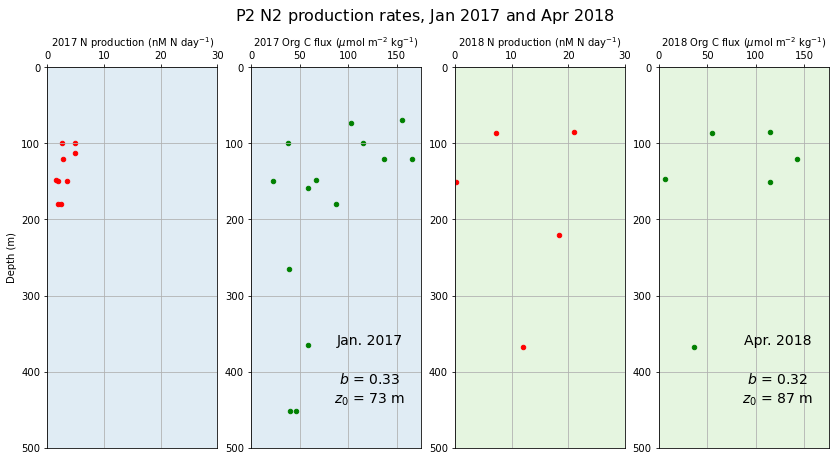

In [17]:
# Four-panel plot in depth space

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=False, figsize=(14, 7))

fig2.suptitle('P2 N${2}$ production rates, Jan 2017 and Apr 2018', fontsize=16, y = 1.0)

# N2 prod 2017

P2_2017.plot(ax = ax2, kind='scatter', x='Adjusted N prod (nM N/day)', y='Pressure [dbar]', c='Red')
ax2.set_facecolor('#e0ecf4')
ax2.set_xlim([0,30])
ax2.set_ylim([0,500])
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('2017 N production (nM N day$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux 2017

P2_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
ax3.set_facecolor('#e0ecf4')
ax3.set_xlim([0,175])
ax3.set_ylim([0,500])
ax3.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_ylabel('')
ax3.set_xlabel('2017 Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

ax3.annotate('Jan. 2017', xy=(150, 100), 
            xytext=(0.7, 0.3), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

ax3.annotate('$\it{b}$ = 0.33', xy=(150, 100), 
            xytext=(0.7, 0.2), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

ax3.annotate('$\it{z}_0$ = 73 m', xy=(150, 100), 
            xytext=(0.7, 0.15), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# N prod 2018

P2_2018.plot(ax = ax4, kind='scatter', x='Adjusted N prod (nM N/day)', y='Pressure [dbar]', c='Red')
ax4.set_facecolor('#e5f5e0')
ax4.set_xlim([0,30])
ax4.set_ylim([0,500])
ax4.set_ylim(ax4.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax4.set_ylabel('')
ax4.set_xlabel('2018 N production (nM N day$^{-1}$)')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Organic carbon flux 2018

P2_2018.plot(ax = ax5, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', \
             c='Green')
ax5.set_facecolor('#e5f5e0')
ax5.set_ylim([0,500])
ax5.set_xlim([0,175])
ax5.set_ylim(ax5.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax5.set_ylabel('')
ax5.set_xlabel('2018 Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

ax5.annotate('Apr. 2018', xy=(150, 100), 
            xytext=(0.7, 0.3), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

ax5.annotate('$\it{b}$ = 0.32', xy=(150, 100), 
            xytext=(0.7, 0.2), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

ax5.annotate('$\it{z}_0$ = 87 m', xy=(150, 100), 
            xytext=(0.7, 0.15), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            );

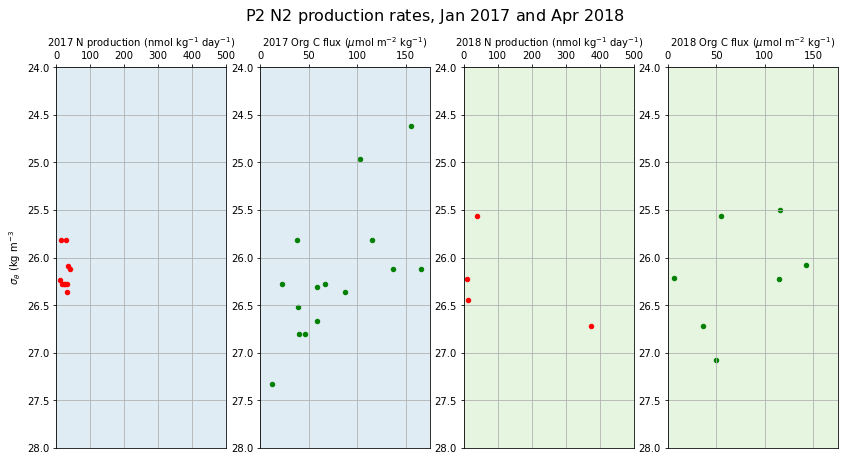

In [18]:
# Four-panel plot in density space

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=False, figsize=(14, 7))

fig2.suptitle('P2 N${2}$ production rates, Jan 2017 and Apr 2018', fontsize=16, y = 1.0)

# N2 prod 2017

P2_join_2017.plot(ax = ax2, kind='scatter', x='N production rate (nM N/day)', y='sigma-t00', c='Red')
ax2.set_facecolor('#e0ecf4')
ax2.set_xlim([0,500])
ax2.set_ylim([24,28])
ax2.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$")
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('2017 N production (nmol kg$^{-1}$ day$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux 2017

P2_join_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='sigma-t00', c='Green')
ax3.set_facecolor('#e0ecf4')
ax3.set_xlim([0,175])
ax3.set_ylim([24,28])
ax3.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_ylabel('')
ax3.set_xlabel('2017 Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# N prod 2018

P2_join_2018.plot(ax = ax4, kind='scatter', x='N production rate (nM N/day)', y='sigma-�00', c='Red')
ax4.set_facecolor('#e5f5e0')
ax4.set_xlim([0,500])
ax4.set_ylim([24,28])
ax4.set_ylim(ax4.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax4.set_ylabel('')
ax4.set_xlabel('2018 N production (nmol kg$^{-1}$ day$^{-1}$)')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Organic carbon flux 2018

P2_join_2018.plot(ax = ax5, kind='scatter', x='Org C flux (umol C/m2/day)', y='sigma-�00', c='Green')
ax5.set_facecolor('#e5f5e0')
ax5.set_ylim([24,28])
ax5.set_xlim([0,175])
ax5.set_ylim(ax5.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax5.set_ylabel('')
ax5.set_xlabel('2018 Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# P1

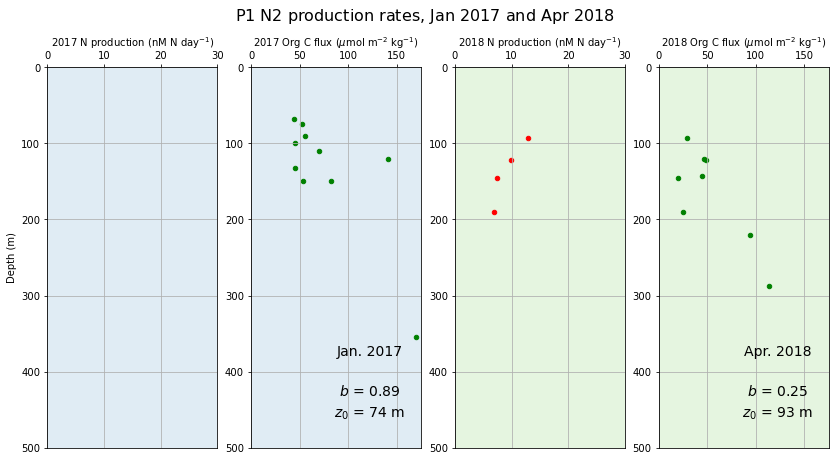

In [19]:
# Four-panel plot in depth space

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=False, figsize=(14, 7))

fig2.suptitle('P1 N${2}$ production rates, Jan 2017 and Apr 2018', fontsize=16, y = 1.0)

# N2 prod 2017

P1_2017.plot(ax = ax2, kind='scatter', x='Adjusted N prod (nM N/day)', y='Pressure [dbar]', c='Red')
ax2.set_facecolor('#e0ecf4')
ax2.set_xlim([0,30])
ax2.set_ylim([0,500])
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('2017 N production (nM N day$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

ax2.annotate('No rate data P1 2017', xy=(150, 100), 
            xytext=(0.5, 0.5), textcoords='axes fraction',
            color='black', fontsize=10,
            horizontalalignment='center', verticalalignment='top'
            )

# Organic carbon flux 2017

P1_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
ax3.set_facecolor('#e0ecf4')
ax3.set_xlim([0,175])
ax3.set_ylim([0,500])
ax3.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_ylabel('')
ax3.set_xlabel('2017 Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

ax3.annotate('Jan. 2017', xy=(150, 100), 
            xytext=(0.7, 0.27), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

ax3.annotate('$\it{b}$ = 0.89', xy=(150, 100), 
            xytext=(0.7, 0.17), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

ax3.annotate('$\it{z_0}$ = 74 m', xy=(150, 100), 
            xytext=(0.7, 0.112), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# N prod 2018

P1_2018.plot(ax = ax4, kind='scatter', x='Adjusted N prod (nM N/day)', y='Pressure [dbar]', c='Red')
ax4.set_facecolor('#e5f5e0')
ax4.set_xlim([0,30])
ax4.set_ylim([0,500])
ax4.set_ylim(ax4.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax4.set_ylabel('')
ax4.set_xlabel('2018 N production (nM N day$^{-1}$)')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Organic carbon flux 2018

P1_2018.plot(ax = ax5, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', \
             c='Green')
ax5.set_facecolor('#e5f5e0')
ax5.set_ylim([0,500])
ax5.set_xlim([0,175])
ax5.set_ylim(ax5.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax5.set_ylabel('')
ax5.set_xlabel('2018 Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

ax5.annotate('Apr. 2018', xy=(150, 100), 
            xytext=(0.7, 0.27), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

ax5.annotate('$\it{b}$ = 0.25', xy=(150, 100), 
            xytext=(0.7, 0.17), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

ax5.annotate('$\it{z_0}$ = 93 m', xy=(150, 100), 
            xytext=(0.7, 0.112), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            );

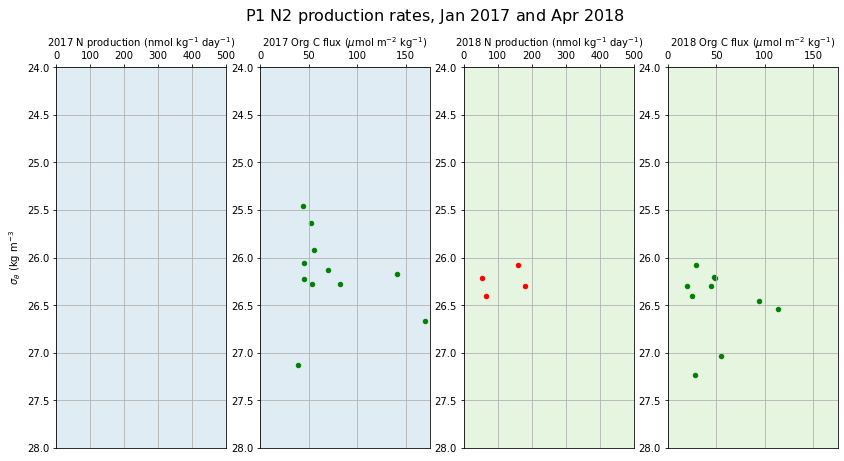

In [23]:
# Four-panel plot in density space

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=False, figsize=(14, 7))

fig2.suptitle('P1 N${2}$ production rates, Jan 2017 and Apr 2018', fontsize=16, y = 1.0)

# N2 prod 2017

P1_join_2017.plot(ax = ax2, kind='scatter', x='N production rate (nM N/day)', y='sigma-t00', c='Red')
ax2.set_facecolor('#e0ecf4')
ax2.set_xlim([0,500])
ax2.set_ylim([24,28])
ax2.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$")
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('2017 N production (nmol kg$^{-1}$ day$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux 2017

P1_join_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='sigma-t00', c='Green')
ax3.set_facecolor('#e0ecf4')
ax3.set_xlim([0,175])
ax3.set_ylim([24,28])
ax3.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_ylabel('')
ax3.set_xlabel('2017 Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# N prod 2018

P1_join_2018.plot(ax = ax4, kind='scatter', x='N production rate (nM N/day)', y='sigma-�00', c='Red')
ax4.set_facecolor('#e5f5e0')
ax4.set_xlim([0,500])
ax4.set_ylim([24,28])
ax4.set_ylim(ax4.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax4.set_ylabel('')
ax4.set_xlabel('2018 N production (nmol kg$^{-1}$ day$^{-1}$)')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Organic carbon flux 2018

P1_join_2018.plot(ax = ax5, kind='scatter', x='Org C flux (umol C/m2/day)', y='sigma-�00', c='Green')
ax5.set_facecolor('#e5f5e0')
ax5.set_ylim([24,28])
ax5.set_xlim([0,175])
ax5.set_ylim(ax5.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax5.set_ylabel('')
ax5.set_xlabel('2018 Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True);